In [1]:
# for data manipulation
import pandas as pd
import numpy as np

# files for graph visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for time series visualizations
from pandas.tseries.offsets import BDay
isBusinessDay = BDay().is_on_offset
from datetime import datetime

# to access main folder location
import os

In [2]:
data_location = 'C:/Users/tasbe/OneDrive/Desktop/job_search/career_change/portfolio_projects/covid_learning/data/processed_data'
school_status_data = os.chdir(data_location + "/covid_openings")

##### California

<AxesSubplot:xlabel='date'>

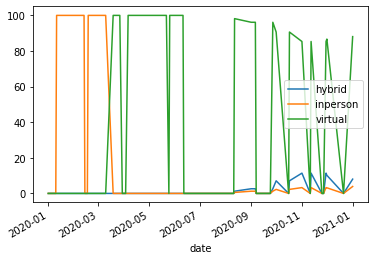

In [3]:
# access processed_data folder and read california school status csv
school_status_df = pd.read_csv('california_status.csv')
school_status_df['model'] = school_status_df['model'].str.lower()

# group status by date and type
school_status_df = school_status_df.groupby(['start', 'model']).sum(['enrollment']).reset_index()
school_status_df = school_status_df.loc[school_status_df['model'] != 'closed'] #delete value - it only appears a few times and always only 4 students

# pivot table and calculate percentage of students in virtual, hybrid and in-person learning
school_status_pivoted = school_status_df.pivot(index = 'start', columns = 'model', values = 'enrollment').reset_index()
school_status_pivoted['hybrid_percent'] = (school_status_pivoted['hybrid']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual'])) * 100
school_status_pivoted['inperson_percent'] = (school_status_pivoted['in-person']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
school_status_pivoted['virtual_percent'] = (school_status_pivoted['virtual']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
status_percent_df = school_status_pivoted[['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
status_percent_df = status_percent_df.loc[status_percent_df['start'] != '8/1/2020'] #school starts
status_percent_df = status_percent_df.fillna(0)

# add dates for start of year, start of online learning and summer holidays
add_dates = pd.DataFrame([['1/1/2020', 0, 0, 0], ['1/10/2020', 0, 0, 0], ['1/11/2020', 0, 100, 0],
                            ['2/13/2020', 0, 100, 0], ['2/14/2020', 0, 0, 0], 
                            ['2/17/2020', 0, 0, 0], ['2/18/2020', 0, 100, 0],
                            ['3/10/2020', 0, 100, 0], ['3/19/2020', 0, 0, 100], 
                            ['3/27/2020', 0, 0, 100], ['3/30/2020', 0, 0, 0], 
                            ['4/3/2020', 0, 0, 0], ['4/6/2020', 0, 0, 100], 
                            ['5/22/2020', 0, 0, 100], ['5/25/2020', 0, 0, 0], ['5/26/2020', 0, 0, 100],
                            ['6/11/2020', 0, 0, 100], ['6/12/2020', 0, 0, 0],
                            ['8/11/2020', 0, 0, 0],  ['8/12/2020', 1.253411, .565927, 98.180662],
                            ['9/6/2020', 02.6222, 01.2444, 96.1333],
                            ['9/7/2020', 0, 0, 0], ['9/24/2020', 0, 0, 0], ['9/27/2020',02.6222, 01.2444, 96.1333],
                            ['10/16/2020', 0, 0, 0], ['10/17/2020', 7.084996,2.272045, 90.642959],
                            ['11/11/2020', 0, 0, 0], ['11/12/2020', 11.395454, 3.270293, 85.334253],
                            ['11/25/2020', 0, 0, 0], ['11/27/2020', 0, 0, 0], ['11/30/2020', 11.395454, 3.270293, 85.334253],
                            ['12/21/2020', 0, 0, 0]])
add_dates.columns = ['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']

#combine the added dates with the ones from the original data.
status_df = pd.concat([status_percent_df, add_dates])
status_df['start'] = pd.to_datetime(status_df['start'])

#keep only data from 2020
newyear_string = "2021-01-02"
new_year = datetime.fromisoformat(newyear_string)
status_df = status_df.loc[status_df['start'] < new_year]

status_df['state_calendars'] = 'california'
california_df = status_df[['state_calendars', 'start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
california_df.columns = ['state_calendars', 'date', 'hybrid', 'inperson', 'virtual']

california_df.plot(x='date') 

##### Connecticut

<AxesSubplot:xlabel='date'>

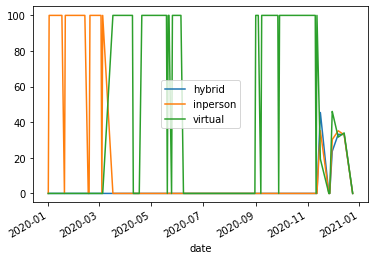

In [4]:
# access processed_data folder and read school status csv
data_location = 'C:/Users/tasbe/OneDrive/Desktop/job_search/career_change/portfolio_projects/covid_learning/data/processed_data'
school_status_data = os.chdir(data_location + "/covid_openings")
school_status_df = pd.read_csv('connecticut_status.csv')
school_status_df['model'] = school_status_df['model'].str.lower()

# group status by date and type
school_status_df = school_status_df.groupby(['start', 'model']).sum(['enrollment']).reset_index()
school_status_df = school_status_df.loc[school_status_df['model'] != 'closed'] #delete value - it only appears a few times and always only 4 students

# pivot table and calculate percentage of students in virtual, hybrid and in-person learning
school_status_pivoted = school_status_df.pivot(index = 'start', columns = 'model', values = 'enrollment').reset_index()
school_status_pivoted['hybrid_percent'] = (school_status_pivoted['hybrid']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual'])) * 100
school_status_pivoted['inperson_percent'] = (school_status_pivoted['in-person']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
school_status_pivoted['virtual_percent'] = (school_status_pivoted['virtual']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
status_percent_df = school_status_pivoted[['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
status_percent_df = status_percent_df.loc[status_percent_df['start'] != '8/1/2020'] #school starts 
status_percent_df = status_percent_df.fillna(0)

# add dates for start of year, start of online learning and holidays
add_dates = pd.DataFrame([['1/1/2020', 0, 0, 0], ['1/2/2020', 0, 100, 0], ['1/17/2020', 0, 100, 0],
                          ['1/20/2020', 0, 0, 0], ['1/21/2020', 0, 100, 0],
                          ['2/13/2020', 0, 100, 0], ['2/17/2020', 0, 0, 0], ['2/18/2020', 0, 0, 0], 
                          ['2/19/2020', 0, 100, 0],
                          ['3/3/2020', 0, 100, 0], ['3/4/2020', 0, 0, 0], ['3/5/2020', 0, 100, 0],
                          ['3/17/2020', 0, 0, 100], 
                          ['4/9/2020', 0, 0, 100], ['4/10/2020', 0, 0, 0], 
                          ['4/17/2020', 0, 0, 0], ['4/20/2020', 0, 0, 100], 
                          ['5/19/2020', 0, 0, 100], ['5/20/2020', 0, 0, 0], ['5/21/2020', 0, 0, 100],
                          ['5/22/2020', 0, 0, 100], ['5/25/2020', 0, 0, 0], ['5/26/2020', 0, 0, 100],
                          ['6/5/2020', 0, 0, 100], ['6/8/2020', 0, 0, 0],
                          ['8/31/2020', 0, 0, 0],  ['9/1/2020',0,0,100], ['9/4/2020',0,0,100],
                          ['9/7/2020', 0, 0, 0], ['9/8/2020', 0, 0, 100], ['9/27/2020', 0, 0, 100],
                          ['9/28/2020', 0, 0, 0], ['9/29/2020', 0, 0, 100],
                          ['11/10/2020', 0, 0, 100], ['11/11/2020', 0, 0, 0], ['11/12/2020', 0, 0, 100],
                          ['11/26/2020',0,0,0], ['11/27/2020', 0, 0, 0], ['11/30/2020',23.693655, 30.253076,46.053269],
                          ['12/24/2020', 0, 0, 0]])
add_dates.columns = ['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']

#combine the added dates with the ones from the original data.
status_df = pd.concat([status_percent_df, add_dates])
status_df['start'] = pd.to_datetime(status_df['start'])

#keep only data from 2020
newyear_string = "2021-01-02"
new_year = datetime.fromisoformat(newyear_string)
status_df = status_df.loc[status_df['start'] < new_year]

status_df['state_calendars'] = 'connecticut'
connecticut_df = status_df[['state_calendars', 'start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
connecticut_df.columns = ['state_calendars', 'date', 'hybrid', 'inperson', 'virtual']

connecticut_df.plot(x='date') 

#### Illinois

<AxesSubplot:xlabel='date'>

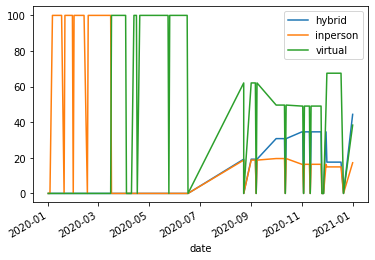

In [5]:
# access processed_data folder and read illinois school status csv
school_status_df = pd.read_csv('illinois_status.csv')
school_status_df['model'] = school_status_df['model'].str.lower()

# group status by date and type
school_status_df = school_status_df.groupby(['start', 'model']).sum(['enrollment']).reset_index()
school_status_df = school_status_df.loc[school_status_df['model'] != 'closed'] #delete value - it only appears a few times and always only 4 students

# pivot table and calculate percentage of students in virtual, hybrid and in-person learning
school_status_pivoted = school_status_df.pivot(index = 'start', columns = 'model', values = 'enrollment').reset_index()
school_status_pivoted['hybrid_percent'] = (school_status_pivoted['hybrid']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual'])) * 100
school_status_pivoted['inperson_percent'] = (school_status_pivoted['in-person']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
school_status_pivoted['virtual_percent'] = (school_status_pivoted['virtual']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
status_percent_df = school_status_pivoted[['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
status_percent_df = status_percent_df.loc[status_percent_df['start'] != '8/1/2020'] #school starts
status_percent_df = status_percent_df.fillna(0)
add_dates = pd.DataFrame([['1/1/2020', 0, 0, 0], ['1/3/2020', 0, 0, 0], ['1/6/2020', 0, 100, 0],
                          ['1/17/2020', 0, 100, 0], ['1/20/2020', 0, 0, 0], ['1/21/2020', 0, 100, 0],
                          ['1/30/2020', 0, 100, 0], ['1/31/2020', 0, 0, 0],
                          ['2/1/2020', 0, 100, 0],
                          ['2/13/2020', 0, 100, 0], ['2/17/2020', 0, 0, 0], ['2/18/2020', 0, 100, 0], 
                          ['3/16/2020', 0, 100, 0], ['3/17/2020', 0, 0, 100],
                          ['4/3/2020', 0, 0, 100], ['4/4/2020', 0, 0, 0], ['4/10/2020', 0, 0, 0],
                          ['4/13/2020', 0, 0, 100], ['4/16/2020', 0, 0, 100], ['4/17/2020', 0, 0, 0],
                          ['4/20/2020', 0, 0, 100],
                          ['5/24/2020', 0, 0, 100], ['5/25/2020', 0, 0, 0], ['5/26/2020', 0, 0, 100],
                          ['6/16/2020', 0, 0, 100], ['6/17/2020', 0, 0, 0],
                          ['8/23/2020',0,0,0], ['8/23/2020', 19.224777, 18.714575, 62.06064],
                          ['9/6/2020', 19.224777, 18.714575, 62.06064],['9/7/2020', 0, 0, 0],
                          ['9/8/2020', 19.224777, 18.714575, 62.06064],
                          ['10/11/2020', 30.786595,19.590400,49.623005],
                          ['10/12/2020',0,0,0], ['10/13/2020', 30.786595,19.590400,49.623005],
                          ['11/2/2020', 34.584027,16.356305,49.059668], ['11/3/2020', 0, 0, 0],
                          ['11/4/2020', 34.584027,16.356305,49.059668], 
                          ['11/10/2020', 34.584027,16.356305,49.059668], ['11/11/2020', 0, 0, 0],
                          ['11/12/2020', 34.584027,16.356305,49.059668], 
                          ['11/24/2020', 34.584027,16.356305,49.059668],
                          ['11/25/2020', 0, 0, 0], ['11/27/2020', 0, 0, 0], 
                          ['11/30/2020', 34.584027,16.356305,49.059668],
                          ['12/18/2020', 17.579812,14.897868,67.522321],
                          ['12/21/2020', 0, 0, 0], ['12/21/2020', 0, 0, 0]])
add_dates.columns = ['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']

#combine the added dates with the ones from the original data.
status_df = pd.concat([status_percent_df, add_dates])
status_df['start'] = pd.to_datetime(status_df['start'])

#keep only data from 2020
newyear_string = "2021-01-02"
new_year = datetime.fromisoformat(newyear_string)
status_df = status_df.loc[status_df['start'] < new_year]

status_df['state_calendars'] = 'illinois'
illinois_df = status_df[['state_calendars', 'start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
illinois_df.columns = ['state_calendars', 'date', 'hybrid', 'inperson', 'virtual']

illinois_df.plot(x='date') 

#### Indiana

<AxesSubplot:xlabel='date'>

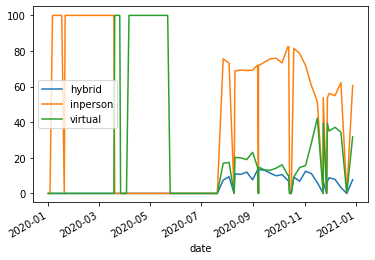

In [6]:
# access processed_data folder and read california school status csv
data_location = 'C:/Users/tasbe/OneDrive/Desktop/job_search/career_change/portfolio_projects/covid_learning/data/processed_data'
school_status_data = os.chdir(data_location + "/covid_openings")
school_status_df = pd.read_csv('indiana_status.csv')
school_status_df['model'] = school_status_df['model'].str.lower()

# group status by date and type
school_status_df = school_status_df.groupby(['start', 'model']).sum(['enrollment']).reset_index()
school_status_df = school_status_df.loc[school_status_df['model'] != 'closed']#delete value - it only appears a few times and always only 4 students


# pivot table and calculate percentage of students in virtual, hybrid and in-person learning
school_status_pivoted = school_status_df.pivot(index = 'start', columns = 'model', values = 'enrollment').reset_index()
school_status_pivoted['hybrid_percent'] = (school_status_pivoted['hybrid']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual'])) * 100
school_status_pivoted['inperson_percent'] = (school_status_pivoted['in-person']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
school_status_pivoted['virtual_percent'] = (school_status_pivoted['virtual']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
status_percent_df = school_status_pivoted[['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
status_percent_df = status_percent_df.loc[status_percent_df['start'] != '8/1/2020'] #school starts 
status_percent_df = status_percent_df.fillna(0)

# add dates for start of year, start of online learning and holidays
add_dates = pd.DataFrame([['1/1/2020', 0, 0, 0], ['1/3/2020', 0, 0, 0], ['1/6/2020', 0, 100, 0], ['1/17/2020', 0, 100, 0],
                          ['1/20/2020', 0, 0, 0], ['1/21/2020', 0, 100, 0],
                          ['3/19/2020', 0, 100, 0], ['3/20/2020', 0, 0, 100], ['3/26/2020', 0, 0, 100],
                          ['3/27/2020', 0, 0, 0], ['4/3/2020', 0, 0, 0],  ['4/6/2020', 0, 0, 100],
                          ['5/22/2020', 0, 0, 100], ['5/25/2020', 0, 0, 0], ['8/9/2020', 0, 0, 0], 
                          ['9/6/2020', 13.407953, 72.007502, 14.584545], ['9/7/2020', 0, 0, 0],
                          ['9/8/2020', 13.407953, 72.007502, 14.584545],
                          ['10/13/2020', 07.2864, 82.4817, 10.2319],
                          ['10/14/2020', 0, 0, 0], ['10/16/2020', 0, 0, 0], 
                          ['11/23/2020', 0, 0, 0], ['11/27/2020', 0, 0, 0], ['11/28/2020', 6.7992,53.8091,39.3917],
                          ['12/21/2020', 0, 0, 0]])

add_dates.columns = ['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']

#combine the added dates with the ones from the original data.
status_df = pd.concat([status_percent_df, add_dates])
status_df['start'] = pd.to_datetime(status_df['start'])

#keep only data from 2020
newyear_string = "2021-01-02"
new_year = datetime.fromisoformat(newyear_string)
status_df = status_df.loc[status_df['start'] < new_year]

status_df['state_calendars'] = 'indiana'
indiana_df = status_df[['state_calendars', 'start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
indiana_df.columns = ['state_calendars', 'date', 'hybrid', 'inperson', 'virtual']

indiana_df.plot(x='date') 

#### Massachusetts

<AxesSubplot:xlabel='date'>

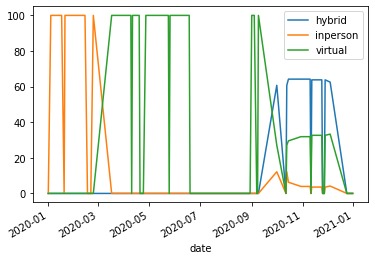

In [7]:
# access processed_data folder and read school status csv
data_location = 'C:/Users/tasbe/OneDrive/Desktop/job_search/career_change/portfolio_projects/covid_learning/data/processed_data'
school_status_data = os.chdir(data_location + "/covid_openings")
school_status_df = pd.read_csv('massachusetts_status.csv')
school_status_df['model'] = school_status_df['model'].str.lower()

# group status by date and type
school_status_df = school_status_df.groupby(['start', 'model']).sum(['enrollment']).reset_index()
school_status_df = school_status_df.loc[school_status_df['model'] != 'closed'] #delete value - it only appears a few times and always only 4 students

# pivot table and calculate percentage of students in virtual, hybrid and in-person learning
school_status_pivoted = school_status_df.pivot(index = 'start', columns = 'model', values = 'enrollment').reset_index()
school_status_pivoted['hybrid_percent'] = (school_status_pivoted['hybrid']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual'])) * 100
school_status_pivoted['inperson_percent'] = (school_status_pivoted['in-person']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
school_status_pivoted['virtual_percent'] = (school_status_pivoted['virtual']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
status_percent_df = school_status_pivoted[['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
status_percent_df = status_percent_df.loc[status_percent_df['start'] != '8/1/2020'] #school starts
status_percent_df = status_percent_df.fillna(0)

# add dates for start of year, start of online learning and holidays
add_dates = pd.DataFrame([['1/1/2020', 0, 0, 0], ['1/4/2020', 0, 100, 0], ['1/17/2020', 0, 100, 0],
                          ['1/20/2020', 0, 0, 0], ['1/21/2020', 0, 100, 0],  
                          ['2/14/2020', 0, 100, 0], ['2/17/2020', 0, 0, 0], ['2/21/2020', 0, 0, 0], ['2/24/2020', 0, 100, 0],
                          ['3/17/2020', 0, 0, 100], 
                          ['4/9/2020', 0, 0, 100], ['4/10/2020', 0, 0, 0], ['4/11/2020', 0, 0, 100],
                          ['4/19/2020', 0, 0, 100], ['4/20/2020', 0, 0, 0], ['4/24/2020', 0, 0, 0],
                          ['4/27/2020', 0, 0, 100],
                          ['5/24/2020', 0, 0, 100], ['5/25/2020', 0, 0, 0], ['5/26/2020', 0, 0, 100],
                          ['6/18/2020',0,0,100], ['6/19/2020',0,0,0],
                          ['8/30/2020',0,0,0], ['9/1/2020',0,0,100], ['9/4/2020',0,0,100],
                          ['9/7/2020',0,0,0], ['9/8/2020',0,0,0], ['9/9/2020',0,0,100],
                          ['10/12/2020',0,0,0], ['10/13/2020', 60.722238,12.171614,27.106147],
                          ['11/10/2020', 64.197830,3.923581,31.878589], ['11/11/2020',0,0,0],
                          ['11/24/2020', 63.791464,3.572931,32.635605], ['11/25/2020',0,0,0],
                          ['11/27/2020',0,0,0], ['11/28/2020', 63.791464,3.572931,32.635605],
                          ['12/24/2020',0,0,0], ['12/31/2020',0,0,0]])
add_dates.columns = ['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']

#combine the added dates with the ones from the original data.
status_df = pd.concat([status_percent_df, add_dates])
status_df['start'] = pd.to_datetime(status_df['start'])

#keep only data from 2020
newyear_string = "2021-01-02"
new_year = datetime.fromisoformat(newyear_string)
status_df = status_df.loc[status_df['start'] < new_year]

status_df['state_calendars'] = 'massachusetts'
massachusetts_df = status_df[['state_calendars', 'start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
massachusetts_df.columns = ['state_calendars', 'date', 'hybrid', 'inperson', 'virtual']

massachusetts_df.plot(x='date') 

#### Missouri

<AxesSubplot:xlabel='date'>

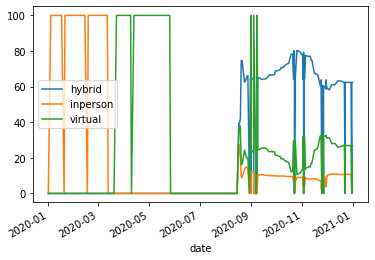

In [8]:
# access processed_data folder and read school status csv
data_location = 'C:/Users/tasbe/OneDrive/Desktop/job_search/career_change/portfolio_projects/covid_learning/data/processed_data'
school_status_data = os.chdir(data_location + "/covid_openings")
school_status_df = pd.read_csv('missouri_status.csv')
school_status_df['model'] = school_status_df['model'].str.lower()
school_status_df['model'].replace({'blend onsite/distanced': 'hybrid', 'distanced': 'virtual', 'onsite': 'in-person',
       'onsite w/ distanced option': 'hybrid'}, inplace = True)

# group status by date and type
school_status_df = school_status_df.groupby(['start', 'model']).sum(['enrollment']).reset_index()
school_status_df = school_status_df.loc[school_status_df['model'] != 'closed'] #delete value - it only appears a few times and always only 4 students

# pivot table and calculate percentage of students in virtual, hybrid and in-person learning
school_status_pivoted = school_status_df.pivot(index = 'start', columns = 'model', values = 'enrollment').reset_index()
school_status_pivoted['hybrid_percent'] = (school_status_pivoted['hybrid']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual'])) * 100
school_status_pivoted['inperson_percent'] = (school_status_pivoted['in-person']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
school_status_pivoted['virtual_percent'] = (school_status_pivoted['virtual']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
status_percent_df = school_status_pivoted[['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
status_percent_df = status_percent_df.loc[status_percent_df['start'] != '8/1/2020'] #school starts 
status_percent_df = status_percent_df.fillna(0)

# add dates for start of year, start of online learning and holidays
add_dates = pd.DataFrame([['1/1/2020',0,0,0], ['1/4/2020',0,100,0], ['1/17/2020',0,100,0],
                          ['1/20/2020',0,0,0], ['1/21/2020',0,100,0],
                          ['2/14/2020',0,100,0], ['2/17/2020',0,0,0], ['2/18/2020',0,100,0],
                          ['2/18/2020',0,100,0],
                          ['3/12/2020',0,100,0], ['3/13/2020',0,0,0], ['3/20/2020',0,0,0],
                          ['3/23/2020',0,0,100],
                          ['4/9/2020',0,0,100], ['4/10/2020',0,0,0], ['4/13/2020',0,0,100],
                          ['5/26/2020',0,0,100], ['5/27/2020',0,0,0],
                          ['7/27/2020',0,0,0], ['8/15/2020',0,0,0], ['8/30/2020',0,0,0],
                          ['9/1/2020',0,0,100], ['9/4/2020',0,0,100],
                          ['9/7/2020',0,0,0], ['9/8/2020',0,0,100],
                          ['10/22/2020', 64.195000,6.273336, 29.531664], ['10/23/2020',0,0,0],
                          ['10/24/2020', 64.195000,6.273336, 29.531664],
                          ['11/2/2020', 64.197830,3.923581,31.878589], ['11/3/2020',0,0,0],
                          ['11/4/2020', 64.197830,3.923581,31.878589], ['11/24/2020', 63.791464,3.572931,32.635605],
                          ['11/25/2020',0,0,0], ['11/27/2020',0,0,0],
                          ['11/30/2020', 63.791464,3.572931,32.635605],
                          ['12/23/2020',0,0,0], ['12/31/2020',0,0,0]])
add_dates.columns = ['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']

#combine the added dates with the ones from the original data.
status_df = pd.concat([status_percent_df, add_dates])
status_df['start'] = pd.to_datetime(status_df['start'])

#keep only data from 2020
newyear_string = "2021-01-02"
new_year = datetime.fromisoformat(newyear_string)
status_df = status_df.loc[status_df['start'] < new_year]

status_df['state_calendars'] = 'missouri'
missouri_df = status_df[['state_calendars', 'start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
missouri_df.columns = ['state_calendars', 'date', 'hybrid', 'inperson', 'virtual']

missouri_df.plot(x='date') 

#### New York

<AxesSubplot:xlabel='date'>

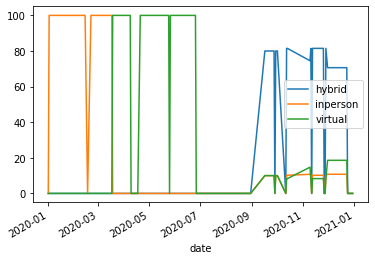

In [9]:
# access processed_data folder and read school status csv
data_location = 'C:/Users/tasbe/OneDrive/Desktop/job_search/career_change/portfolio_projects/covid_learning/data/processed_data'
school_status_data = os.chdir(data_location + "/covid_openings")
school_status_df = pd.read_csv('new_york_status.csv')
school_status_df['model'] = school_status_df['model'].str.lower()

# group status by date and type
school_status_df = school_status_df.groupby(['start', 'model']).sum(['enrollment']).reset_index()
school_status_df = school_status_df.loc[school_status_df['model'] != 'closed'] #delete value - it only appears a few times and always only 4 students

# pivot table and calculate percentage of students in virtual, hybrid and in-person learning
school_status_pivoted = school_status_df.pivot(index = 'start', columns = 'model', values = 'enrollment').reset_index()
school_status_pivoted['hybrid_percent'] = (school_status_pivoted['hybrid']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual'])) * 100
school_status_pivoted['inperson_percent'] = (school_status_pivoted['in-person']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
school_status_pivoted['virtual_percent'] = (school_status_pivoted['virtual']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
status_percent_df = school_status_pivoted[['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
status_percent_df = status_percent_df.loc[status_percent_df['start'] != '8/1/2020'] #school starts 
status_percent_df = status_percent_df.fillna(0)

# add dates for start of year, start of online learning and holidays
add_dates = pd.DataFrame([['1/1/2020', 0,  0, 0], ['1/2/2020', 0,  100, 0],  
                          ['2/14/2020', 0, 100, 0], ['2/17/2020', 0, 0, 0], ['2/21/2020', 0, 100, 0],
                          ['3/17/2020', 0, 100, 0], ['3/18/2020', 0, 0, 100], 
                          ['4/8/2020', 0, 0, 100], ['4/9/2020', 0, 0, 0], ['4/17/2020', 0, 0, 0], ['4/20/2020', 0, 0, 100],
                          ['5/24/2020', 0, 0, 100], ['5/25/2020', 0, 0, 0], ['5/26/2020', 0, 0, 100],
                          ['6/25/2020',0,0,100], ['6/26/2020',0,0,0],
                          ['8/30/2020',0,0,0], ['9/16/2020',80,10,10],
                          ['9/21/2020',80,10,10], ['9/27/2020',80,10,10], ['9/28/2020',0,0,0],
                          ['9/29/2020',80,10,10], ['10/1/2020',80,10,10], ['10/11/2020',0,0,0],
                          ['10/13/2020',81.473626,10.203261,8.323114],
                          ['11/10/2020',81.473626,10.203261,8.323114], ['11/11/2020',0,0,0],
                          ['11/12/2020',81.473626,10.203261,8.323114], ['11/25/2020',81.473626,10.203261,8.323114],
                          ['11/26/2020',0,0,0], ['11/27/2020',0,0,0], ['11/28/2020',81.473626,10.203261,8.323114],
                          ['12/23/2020', 70.626575,10.773847,18.599578], ['12/24/2020',0,0,0], ['12/30/2020',0,0,0]])
add_dates.columns = ['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']

#combine the added dates with the ones from the original data.
status_df = pd.concat([status_percent_df, add_dates])
status_df['start'] = pd.to_datetime(status_df['start'])

#keep only data from 2020
newyear_string = "2021-01-02"
new_year = datetime.fromisoformat(newyear_string)
status_df = status_df.loc[status_df['start'] < new_year]

status_df['state_calendars'] = 'new york'
new_york_df = status_df[['state_calendars', 'start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
new_york_df.columns = ['state_calendars', 'date', 'hybrid', 'inperson', 'virtual']

new_york_df.plot(x='date') 

#### Ohio

<AxesSubplot:xlabel='date'>

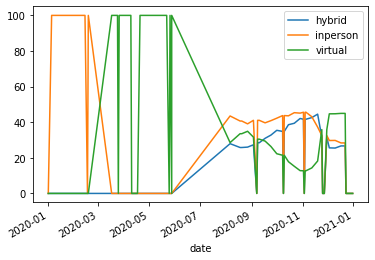

In [10]:
# access processed_data folder and read school status csv
data_location = 'C:/Users/tasbe/OneDrive/Desktop/job_search/career_change/portfolio_projects/covid_learning/data/processed_data'
school_status_data = os.chdir(data_location + "/covid_openings")
school_status_df = pd.read_csv('ohio_status.csv')
school_status_df['model'] = school_status_df['model'].str.lower()
school_status_df['model'].replace({'5-day in-person': 'in-person', 'fully remote': 'virtual', 'closed all week': 'NAN',
                                   'full acccess to hybrid': 'hybrid', 'partial access to hybrid': 'hybrid',
                                   'full access to hybrid': 'hybrid'}, inplace = True)

# group status by date and type
school_status_df = school_status_df.groupby(['start', 'model']).sum(['enrollment']).reset_index()
school_status_df = school_status_df.loc[school_status_df['model'] != 'closed'] #delete value - it only appears a few times and always only 4 students

# pivot table and calculate percentage of students in virtual, hybrid and in-person learning
school_status_pivoted = school_status_df.pivot(index = 'start', columns = 'model', values = 'enrollment').reset_index()
school_status_pivoted['hybrid_percent'] = (school_status_pivoted['hybrid']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual'])) * 100
school_status_pivoted['inperson_percent'] = (school_status_pivoted['in-person']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
school_status_pivoted['virtual_percent'] = (school_status_pivoted['virtual']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
status_percent_df = school_status_pivoted[['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
status_percent_df = status_percent_df.loc[status_percent_df['start'] != '8/1/2020'] #school starts
status_percent_df = status_percent_df.fillna(0)

# add dates for start of year, start of online learning and holidays
add_dates = pd.DataFrame([['1/1/2020', 0,  0, 0], ['1/5/2020', 0,  100, 0],  
                          ['2/14/2020', 0, 100, 0], ['2/17/2020', 0, 0, 0], ['2/18/2020', 0, 100, 0],
                          ['3/17/2020', 0, 0, 100], ['3/24/2020', 0, 0, 100], ['3/25/2020', 0, 0, 0], 
                          ['3/26/2020', 0, 0, 100],
                          ['4/9/2020', 0, 0, 100], ['4/10/2020', 0, 0, 0], ['4/17/2020', 0, 0, 0], 
                          ['4/20/2020', 0, 0, 100],
                          ['5/22/2020', 0, 0, 100], ['5/25/2020', 0, 0, 0], ['5/26/2020', 0, 0, 100], 
                          ['5/28/2020', 0, 0, 100], ['5/28/2020', 0, 0, 0],
                          ['8/18/2020', 25.792767,40.669578,33.537655],
                          ['9/7/2020', 0, 0, 0], ['9/8/2020', 28.462290,41.058595,30.479116], 
                          ['10/9/2020', 0, 0, 0], ['10/10/2020', 34.840598,43.722324,21.437078], 
                          ['11/2/2020', 41.672426,45.598373,12.729202], ['11/3/2020', 0, 0, 0],
                          ['11/4/2020', 41.672426,45.598373,12.729202], 
                          ['11/25/2020', 0, 0, 0], ['11/27/2020', 0, 0, 0], 
                          ['11/30/2020', 31.616025,32.530956,35.853020],
                          ['12/22/2020',26.682269,28.362230,44.955501],
                          ['12/23/2020', 0, 0, 0], ['12/31/2020', 0, 0, 0]])
add_dates.columns = ['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']

#combine the added dates with the ones from the original data.
status_df = pd.concat([status_percent_df, add_dates])
status_df['start'] = pd.to_datetime(status_df['start'])

#keep only data from 2020
newyear_string = "2021-01-02"
new_year = datetime.fromisoformat(newyear_string)
status_df = status_df.loc[status_df['start'] < new_year]

status_df['state_calendars'] = 'ohio'
ohio_df = status_df[['state_calendars', 'start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
ohio_df.columns = ['state_calendars', 'date', 'hybrid', 'inperson', 'virtual']

ohio_df.plot(x='date') 

#### Utah

<AxesSubplot:xlabel='date'>

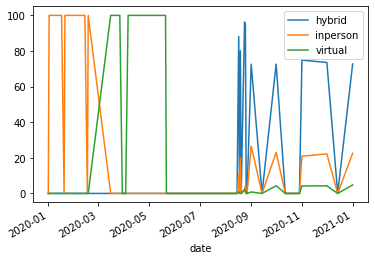

In [12]:
# access processed_data folder and read school status csv
data_location = 'C:/Users/tasbe/OneDrive/Desktop/job_search/career_change/portfolio_projects/covid_learning/data/processed_data'
school_status_data = os.chdir(data_location + "/covid_openings")
school_status_df = pd.read_csv('utah_status.csv')
school_status_df['model'] = school_status_df['model'].str.lower()

# group status by date and type
school_status_df = school_status_df.groupby(['start', 'model']).sum(['enrollment']).reset_index()
school_status_df = school_status_df.loc[school_status_df['model'] != 'closed'] #delete value - it only appears a few times and always only 4 students

# pivot table and calculate percentage of students in virtual, hybrid and in-person learning
school_status_pivoted = school_status_df.pivot(index = 'start', columns = 'model', values = 'enrollment').reset_index()
school_status_pivoted['hybrid_percent'] = (school_status_pivoted['hybrid']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual'])) * 100
school_status_pivoted['inperson_percent'] = (school_status_pivoted['in-person']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
school_status_pivoted['virtual_percent'] = (school_status_pivoted['virtual']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
status_percent_df = school_status_pivoted[['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
status_percent_df = status_percent_df.loc[status_percent_df['start'] != '8/1/2020'] #school starts 
status_percent_df = status_percent_df.fillna(0)

# add dates for start of year, start of online learning and holidays
add_dates = pd.DataFrame([['1/1/2020', 0,  0, 0], ['1/2/2020', 0,  100, 0], ['1/17/2020', 0, 100, 0],
                          ['1/20/2020', 0, 0, 0], ['1/21/2020', 0, 100, 0],  
                          ['2/14/2020', 0, 100, 0], ['2/17/2020', 0, 0, 0], ['2/18/2020', 0, 100, 0],
                          ['3/16/2020', 0, 0, 100], ['3/27/2020', 0, 0, 100], ['3/30/2020', 0, 0, 0],
                          ['4/3/2020', 0, 0, 0], ['4/6/2020', 0, 0, 100],
                          ['5/21/2020', 0, 0, 100], ['5/22/2020', 0, 0, 0]])
add_dates.columns = ['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']

#combine the added dates with the ones from the original data.
status_df = pd.concat([status_percent_df, add_dates])
status_df['start'] = pd.to_datetime(status_df['start'])

#keep only data from 2020
newyear_string = "2021-01-02"
new_year = datetime.fromisoformat(newyear_string)
status_df = status_df.loc[status_df['start'] < new_year]

status_df['state_calendars'] = 'utah'
utah_df = status_df[['state_calendars', 'start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
utah_df.columns = ['state_calendars', 'date', 'hybrid', 'inperson', 'virtual']

utah_df.plot(x='date') 

#### Washington

<AxesSubplot:xlabel='date'>

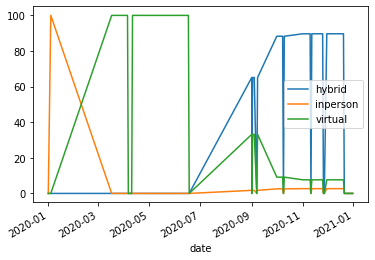

In [13]:
# access processed_data folder and read school status csv
data_location = 'C:/Users/tasbe/OneDrive/Desktop/job_search/career_change/portfolio_projects/covid_learning/data/processed_data'
school_status_data = os.chdir(data_location + "/covid_openings")
school_status_df = pd.read_csv('washington_status.csv')
school_status_df['model'] = school_status_df['model'].str.lower()
school_status_df['model'].replace({'100% remote': 'virtual', 'partial in-person for all students': 'hybrid',
                                   'phase-in': 'hybrid', 'small groups + remote': 'hybrid', 
                                   'typical/traditional in-person': 'in-person',
                                   'not applicable': 'NAN', 'not available': 'NAN'}, inplace=True)

# group status by date and type
school_status_df = school_status_df.groupby(['start', 'model']).sum(['enrollment']).reset_index()
school_status_df = school_status_df.loc[school_status_df['model'] != 'closed'] #delete value - it only appears a few times and always only 4 students

# pivot table and calculate percentage of students in virtual, hybrid and in-person learning
school_status_pivoted = school_status_df.pivot(index = 'start', columns = 'model', values = 'enrollment').reset_index()
school_status_pivoted['hybrid_percent'] = (school_status_pivoted['hybrid']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual'])) * 100
school_status_pivoted['inperson_percent'] = (school_status_pivoted['in-person']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
school_status_pivoted['virtual_percent'] = (school_status_pivoted['virtual']/(school_status_pivoted['hybrid'] + school_status_pivoted['in-person']
                                        + school_status_pivoted['virtual']))* 100
status_percent_df = school_status_pivoted[['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
status_percent_df = status_percent_df.loc[status_percent_df['start'] != '8/1/2020'] #school starts 

# add dates for start of year, start of online learning and holidays
add_dates = pd.DataFrame([['1/1/2020', 0, 0, 0], ['1/4/2020', 0, 100, 0],  
                          ['3/17/2020', 0, 0, 100], 
                          ['4/5/2020', 0, 0, 100], ['4/6/2020', 0, 0, 0], ['4/10/2020', 0, 0, 0],
                          ['4/11/2020', 0, 0, 100],
                          ['6/17/2020', 0, 0, 100], ['6/18/2020', 0, 0, 0],
                          ['9/1/2020',0,0,0], ['9/2/2020', 65.116978,1.723867,33.159154],
                          ['9/4/2020', 65.116978,1.723867,33.159154], ['9/7/2020',0,0,0],
                          ['9/8/2020', 65.116978,1.723867,33.159154],
                          ['10/8/2020', 88.283751, 2.567118,9.149131], ['10/9/2020',0,0,0],
                          ['10/10/2020', 88.283751, 2.567118,9.149131],
                          ['11/10/2020', 89.666835, 2.684531, 7.648634], ['11/11/2020',0,0,0],
                          ['11/12/2020', 89.666835, 2.684531, 7.648634],
                          ['11/25/2020', 89.666835, 2.684531, 7.648634], ['11/26/2020',0,0,0],
                          ['11/27/2020',0,0,0], ['11/30/2020', 89.666835, 2.684531, 7.648634],
                          ['12/20/2020', 89.666835, 2.684531, 7.648634],
                          ['12/21/2020',0,0,0], [ '12/31/2020',0,0,0]])
add_dates.columns = ['start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']

#combine the added dates with the ones from the original data.
status_df = pd.concat([status_percent_df, add_dates])
status_df['start'] = pd.to_datetime(status_df['start'])

#keep only data from 2020
newyear_string = "2021-01-02"
new_year = datetime.fromisoformat(newyear_string)
status_df = status_df.loc[status_df['start'] < new_year]

status_df['state_calendars'] = 'washington'
washington_df = status_df[['state_calendars', 'start', 'hybrid_percent', 'inperson_percent', 'virtual_percent']]
washington_df.columns = ['state_calendars', 'date', 'hybrid', 'inperson', 'virtual']

washington_df.plot(x='date') 

In [14]:
state_dfs = [california_df, connecticut_df, illinois_df, indiana_df, massachusetts_df, 
             missouri_df, new_york_df, ohio_df, utah_df, washington_df]
calendars_df = pd.concat(state_dfs)
calendars_df.to_csv('state_dates.csv')